# Pandas and Advanced plotting
- introduce pandas
- filehandling with pandas
- pandas with pyplot
- pandas with seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Pandas DataFrames
[Pandas](https://pandas.pydata.org/) DataFrames are object that model tables/spreadsheets. They have a lot of functionality for data processing and visualisation. Furthermore they are compatible with a lot of other data processing libraries such as [scikit-learn](https://scikit-learn.org/stable/) which is discussed in chapter 7.

You can create Dataframes from a dictionary as is shown below:

In [3]:
data = {
    "A": [1, 2, 3],
    "B": np.random.rand(3),
    "C": ["a", "b", "c"]
}
data

{'A': [1, 2, 3],
 'B': array([0.99320043, 0.5901252 , 0.24287201]),
 'C': ['a', 'b', 'c']}

In [4]:
df = pandas.DataFrame(data)

In [5]:
df

,A,B,C
0,1,0.993200,a
1,2,0.590125,b
2,3,0.242872,c


## Columns 
The columns are implemented as a class called series. You can use them almost like np.arrays.
It's easy and convenient to access and manipulate the rows using the square brackets and the columns name. As a bonus this also yields fairly readable code.

In [6]:
df["D"] = df["A"] + df["B"]**2

In [7]:
df

,A,B,C,D
0,1,0.993200,a,1.986447
1,2,0.590125,b,2.348248
2,3,0.242872,c,3.058987


In [8]:
# access columns A
df["A"]

0    1
1    2
2    3
Name: A, dtype: int64

In [9]:
df[["A", "B", "D"]]

,A,B,D
0,1,0.993200,1.986447
1,2,0.590125,2.348248
2,3,0.242872,3.058987


## Logical Indexing
Like numpy arrays, there is also logical indexing with Series/DataFrame columns. 

In [10]:
# creating a logical array works just as with numpy
L = df["A"] == 2
L

0    False
1     True
2    False
Name: A, dtype: bool

The logical vectors can be used to extract entire rows from a dataframe or just elements in a column/Series object.

In [13]:
# extract rows using the logical vector.
df[L]

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,A,B,C,D
1,2,0.240018,b,2.057609


In [14]:
# extract elements in a column
df["A"][L] 

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    2
Name: A, dtype: int64

In [15]:
df["B"][L]

1    0.240018
Name: B, dtype: float64

# Loading from and to file

Very practical is the fact that you can open.csv files. I downloaded some random data from the ecdc regarding corona. its in a csv file format. I took it from here https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [16]:
df_corona = pandas.read_csv("data/ecdc_corona.csv")

In [17]:
df_corona

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
1,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
2,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01
3,07/12/2020,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22
4,30/11/2020,2020-48,1073,68,Afghanistan,AF,AFG,38041757.0,Asia,6.42
...,...,...,...,...,...,...,...,...,...,...
9359,20/04/2020,2020-16,11,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.11
9360,13/04/2020,2020-15,5,2,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
9361,06/04/2020,2020-14,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
9362,30/03/2020,2020-13,5,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05


## Use case: analyze corona data for Austria

In [18]:
# let's get all the data regarding austria
is_austria = df_corona["countriesAndTerritories"] == "Austria"

df_austria = df_corona[is_austria]

print(f"Rows concerning austria: {np.sum(is_austria)}")

Rows concerning austria: 52


/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# sort data by date.
#df_austria = df_austria.sort_values("dateRep") # --> does not work because data is in wired format
df_austria = df_austria.sort_index(ascending=False) # --> just flip it upside down

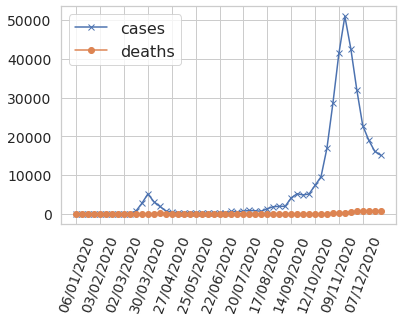

In [20]:
# this sets the size (and thus shape) of the figure
#plt.figure(figsize=(8, 4))

plt.plot(df_austria["dateRep"], df_austria["cases_weekly"], "x-", label="cases")
plt.plot(df_austria["dateRep"], df_austria["deaths_weekly"], "o-", label="deaths")

# use only every ourth date, rotate and increase fontsize
plt.xticks(df_austria["dateRep"].iloc[::4], rotation=70, fontsize=14);
plt.yticks(fontsize=14);

# use legend with suitable font size
plt.legend(fontsize=16)



### Exercise
Find any csv unrelated to this course and visualize some of the data contained in it using pandas and pyplot as we did above.

# Seaborn 
Take a look at https://seaborn.pydata.org/. Their documentation is faily extensive and they have a lot of great examples that demonstrate their usefullness better than I could here.

In [21]:
import seaborn as sb

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## The seaborn color palette
You can use the searborn style sheet as your default [style sheet](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html) to make your plots look nice. However some people worry about the fact that the contrast in the seaborn color palette is not as great as with matplotlib standards.

In [22]:
plt.style.use("seaborn")

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


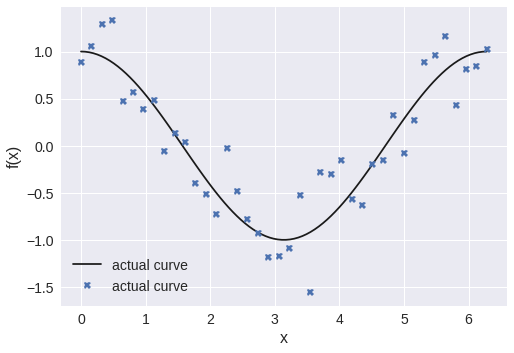

In [42]:
x = np.linspace(0, 2*np.pi, 40)
y = np.cos(x) + np.random.randn(*x.shape)*0.3
t = np.linspace(0, 2*np.pi, 100)

plt.plot(t, np.cos(t), "k-", label="actual curve")
plt.plot(x, y, "X", label="actual curve")

plt.xlabel("x", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

plt.legend(fontsize=14)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


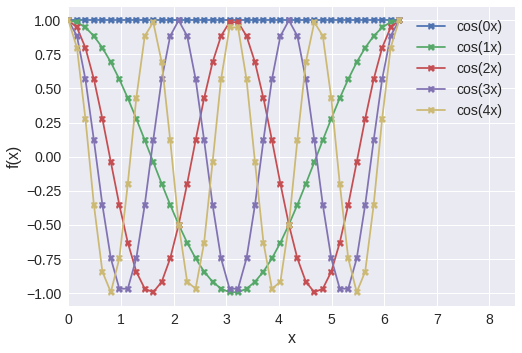

In [47]:
x = np.linspace(0, 2*np.pi, 40)

for i in range(5):
    y = np.cos(i*x) #+ np.random.randn(*x.shape)*0.3
    plt.plot(x, y, "X-", label=f"cos({i}x)")

plt.xlabel("x", fontsize=16)
plt.ylabel("f(x)", fontsize=16)


plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

# make some room for the legend
plt.xlim(0, 2.7*np.pi)

plt.legend(fontsize=14)



## Heatmap

In [53]:
# make a dict with random data
df = {}
for variable in "ABCDEFGHIJ":
    df[variable] = np.random.rand(10)
    
# create df from this dict
df = pandas.DataFrame(df)

In [54]:
correlation = df.corr()

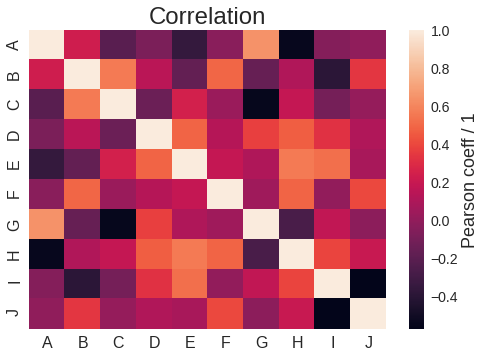

In [69]:
# create heatmap plot
ax = sb.heatmap(correlation)

plt.title("Correlation", fontsize=24)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# increase colorbar tick label size and add label
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label("Pearson coeff / 1", fontsize=18)

# Demo: Seaborn + Pandas
Stolen from, ahm i mean modelled after, https://seaborn.pydata.org/examples/scatterplot_sizes.html

This is the true power of seaborn: it very nicely fits together with pandas. Seaborn takes the Dataframe (via the parameter _data_ and gives you a nice plot after you specify which columns you want to use for the respective axes.

In [23]:
# Load the example planets dataset
planets = sb.load_dataset("planets")

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


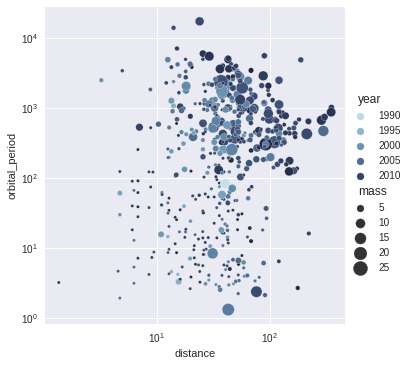

In [29]:


# this is the colormap we will use
cmap = sb.cubehelix_palette(rot=-.2, as_cmap=True)

# do the plotting
g = sb.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)

# change the axis to be logarithmic
g.set(xscale="log", yscale="log");

